In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


### **Extração de Dados / EXTRACTION (ETL)**

In [57]:
df = pd.read_csv('/content/cardio_df.csv')
cardio_df =pd.read_csv('/content/cardio_df.csv')

In [58]:
df.describe()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
count,70000
unique,70000
top,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
freq,1


In [59]:
df = pd.read_csv('/content/cardio_df.csv',sep=';')

In [60]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [62]:
print(df.columns)


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [63]:
# Conjunto de dados após a limpeza
print(f'Número de linhas do conjunto de dados após o pré-processamento: {len(df)}')
print(f'Percentual de valores ausentes: {round((70000 - len(df)) / 70000 * 100, 2)}%')


Número de linhas do conjunto de dados após o pré-processamento: 70000
Percentual de valores ausentes: 0.0%


# Limpeza dos Dados/ Transformation(ETL)

---




In [64]:
# Verificar valores ausentes em cada coluna
valores_ausentes = df.isnull().sum()
print(valores_ausentes)


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [65]:
# Verificar idades negativas
idades_negativas = df[df['age'] < 0]
print(idades_negativas)
# Repetir o mesmo processo para outras colunas relevantes


Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


In [66]:
# Remover entradas duplicadas
df_sem_duplicatas = df.drop_duplicates()


In [67]:
#Converter idade de dias para anos
df['age_years'] = df['age'] / 365

# Excluir a coluna original 'age'
df.drop(columns=['age'], inplace=True)

In [68]:
# Drop the 'id' column from the DataFrame
df= df.drop(columns=['id'])

In [69]:
# Calculando o IMC (Índice de Massa Corporal) do paciente
df['IMC'] = round(df['weight'] / ((df['height'] / 100) ** 2), 1)
#PEGAR UMA IMAGEM QUE MOSTRA O QUE É SAUDAVEL OU NAO EM IMC
# Filtrando os valores extremos (saúde não saudável) dos dados de IMC de acordo com o gráfico de IMC
df = df[(df['IMC'] < 60) & (df['IMC'] > 10)]
df.head()


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,IMC
0,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,22.0
1,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.9
2,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.5
3,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.7
4,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.0


In [70]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,IMC
count,69927.000000,69927.000000,69927.000000,69927.00000,69927.000000,69927.000000,69927.000000,69927.000000,69927.000000,69927.000000,69927.000000,69927.000000,69927.000000
mean,1.349622,164.410786,74.171746,128.81638,96.590788,1.367011,1.226551,0.088135,0.053756,0.803695,0.499693,53.339343,27.478140
std,0.476854,7.953159,14.264488,154.08933,188.431487,0.680370,0.572354,0.283493,0.225537,0.397205,0.500003,6.759015,5.230346
min,1.000000,98.000000,28.000000,-150.00000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562,10.700000
25%,1.000000,159.000000,65.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.394521,23.900000
50%,1.000000,165.000000,72.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.980822,26.400000
75%,2.000000,170.000000,82.000000,140.00000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.430137,30.100000
max,2.000000,250.000000,200.000000,16020.00000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123,59.500000


*A coluna 'Peso' possui valores mínimos/máximos irreais.
A pressão arterial sistólica "ap_hi" e a pressão arterial diastólica "ap_lo" não podem ser negativas.
Se ap_hi e ap_lo forem mais do que 180 e 120 mmHg, respectivamente, então é uma crise hipertensiva, o que é um caso de emergência. Portanto, os valores máximos não são realistas. *

De acordo com estudos:
Podemos assumir que valores maiores que 280 mmHg e 120 mmHg para ap_hi e ap_lo, respectivamente, serão removidos como valores discrepantes. Assim como os valores negativos, pois não podem ser negativos.

In [71]:
# Contagem de outliers
outliers = len(df[(df["ap_hi"] >= 280) | (df["ap_lo"] >= 220) | (df["ap_lo"] < 0) | (df["ap_hi"] < 0) | (df["ap_hi"] < df["ap_lo"])])

# Imprimir o total de outliers
print(f'Temos um total de {outliers} outliers.')

# Imprimir a porcentagem de valores discrepantes
print(f'Percentual de valores discrepantes: {round(outliers/len(df)*100, 1)}%')


Temos um total de 1270 outliers.
Percentual de valores discrepantes: 1.8%


In [72]:
# Calculando os quartis e o intervalo interquartil (IQR) para ap_hi
Q1_hi = df['ap_hi'].quantile(0.05)  # 5º percentil dos dados da característica fornecida
Q3_hi = df['ap_hi'].quantile(0.95)  # 95º percentil dos dados da característica fornecida
IQR_hi = Q3_hi - Q1_hi
lower_hi, upper_hi = Q1_hi - 1.5 * IQR_hi, Q3_hi + 1.5 * IQR_hi
df = df[(df['ap_hi'] >= lower_hi) & (df['ap_hi'] <= upper_hi)]

# Calculando os quartis e o intervalo interquartil (IQR) para ap_lo
Q1_lo = df['ap_lo'].quantile(0.05)  # 5º percentil dos dados da característica fornecida
Q3_lo = df['ap_lo'].quantile(0.95)  # 95º percentil dos dados da característica fornecida
IQR_lo = Q3_lo - Q1_lo
lower_lo, upper_lo = Q1_lo - 1.5 * IQR_lo, Q3_lo + 1.5 * IQR_lo
df = df[(df['ap_lo'] >= lower_lo) & (df['ap_lo'] <= upper_lo)]

In [73]:
print(df.columns)



Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'IMC'],
      dtype='object')


In [74]:
# Formatar a coluna 'idade' para exibir apenas duas casas decimais
df['age_years'] = df['age_years'].astype(float).round(2)
df['age_years'] = df['age_years'].apply(lambda x: '{:.0f}'.format(x))

print(df['age_years'])


0        50
1        55
2        52
3        48
4        48
         ..
69995    53
69996    62
69997    52
69998    61
69999    56
Name: age_years, Length: 68855, dtype: object


In [75]:
genero_counts = df['gender'].value_counts()
genero_counts

,count
gender,
1,44839
2,24016


In [76]:
colesterol_counts2 = df['cholesterol'].value_counts()
colesterol_counts2


,count
cholesterol,
1,51646
2,9325
3,7884


# Visualizações e Análises

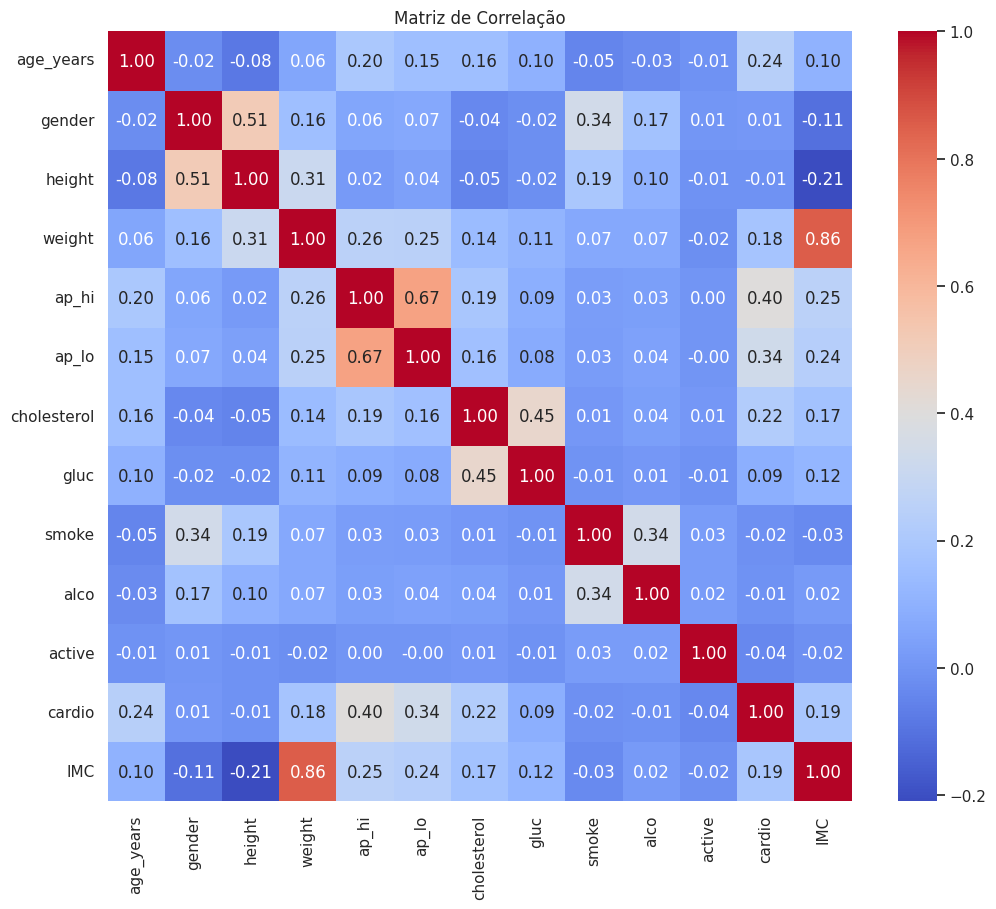

In [77]:
# Criar uma matriz de correlação
corr_matrix = df[['age_years', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco',
       'active', 'cardio','IMC']].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação')
plt.show()


In [78]:
df = df.rename(columns={'ap_hi': 'Pressao_alta'})
df = df.rename(columns={'ap_lo': 'pressao_baixa'})
df = df.rename(columns={'gluc': 'glicose'})
df = df.rename(columns={'alco': 'alcool'})
df = df.rename(columns={'active': 'atividade_fisica'})
df = df.rename(columns={'smoke': 'fumante'})
df = df.rename(columns={'cardio': 'doenca_cardiovascular'})
df = df.rename(columns={'cholesterol': 'colesterol'})
df = df.rename(columns={'age_years': 'idade'})
df = df.rename(columns={'gender': 'genero'})
df = df.rename(columns={'height': 'altura'})
df = df.rename(columns={'weight': 'peso'})

<Axes: >

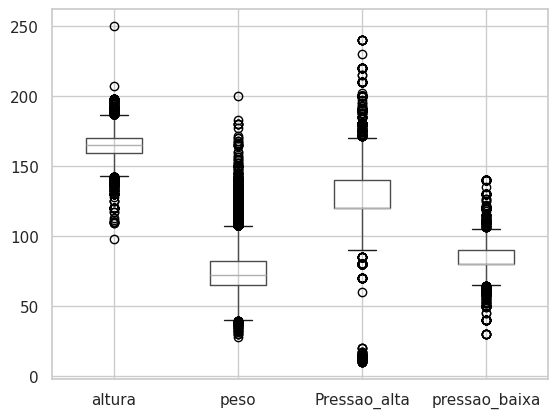

In [79]:
# Selecionando as variáveis numéricas para verificar se tem outliear
numeric_data = df[['idade', 'altura','peso', 'Pressao_alta', 'pressao_baixa']]

# Plotando o boxplot
numeric_data.boxplot()


In [80]:

df.describe()

,genero,altura,peso,Pressao_alta,pressao_baixa,colesterol,glicose,fumante,alcool,atividade_fisica,doenca_cardiovascular,IMC
count,68855.000000,68855.000000,68855.000000,68855.000000,68855.000000,68855.000000,68855.000000,68855.000000,68855.000000,68855.000000,68855.000000,68855.000000
mean,1.348791,164.412098,74.086746,126.331842,81.343214,1.364433,1.225895,0.087924,0.053504,0.803224,0.494764,27.446107
std,0.476591,7.943050,14.209098,17.639780,9.542969,0.678698,0.571829,0.283186,0.225037,0.397564,0.499976,5.210443
min,1.000000,98.000000,28.000000,10.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.700000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.900000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.300000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.100000
max,2.000000,250.000000,200.000000,240.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,59.500000


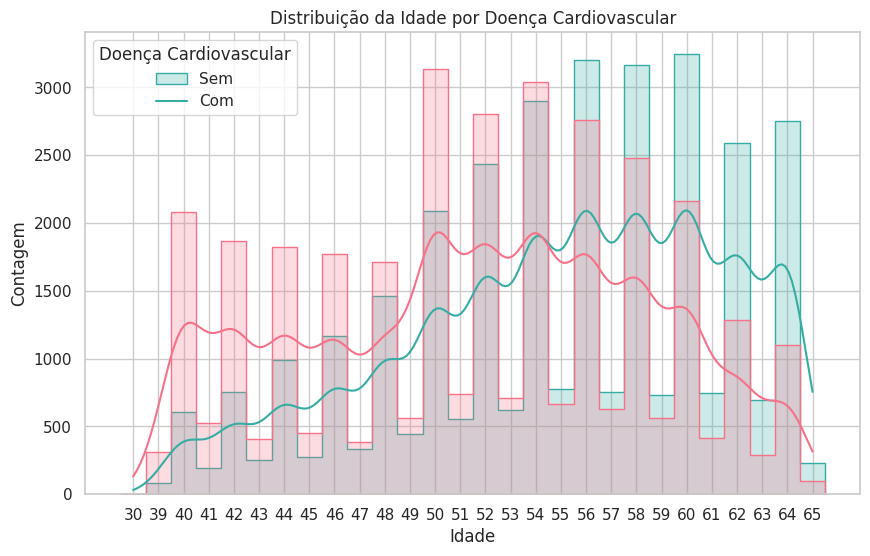

In [81]:
# Ordenar o DataFrame pela variável categórica 'doenca_cardiovascular' em ordem crescente
df_sorted = df.sort_values(by='idade')

# Criar um gráfico de distribuição para a idade dos pacientes com e sem doença cardiovascular
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sorted, x='idade', hue='doenca_cardiovascular', element='step', kde=True, palette='husl')
plt.title('Distribuição da Idade por Doença Cardiovascular')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(title='Doença Cardiovascular', labels=['Sem', 'Com'])
plt.show()

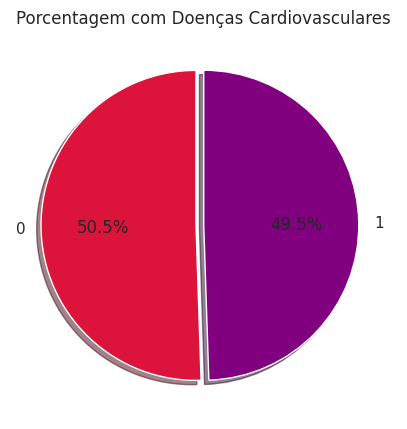

In [82]:
# Crie a figura e os eixos
fig, ax = plt.subplots(figsize=(5, 8))

cardio_colors = ['#DC143C', '#800080']

# Dados para o gráfico
cardio_counts = df['doenca_cardiovascular'].value_counts()

# Crir o gráfico
ax.pie(x=cardio_counts, labels=cardio_counts.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=cardio_colors, explode=(0.05, 0.0))

# Adicionar o título ao gráfico
ax.set_title('Porcentagem com Doenças Cardiovasculares')

# Exibir o gráfico
plt.show()

In [83]:
df['genero'].replace({1: 'Feminino', 2: 'Masculino'}, inplace=True)
df['doenca_cardiovascular'].replace({0:'Sem Doença', 1:'Com Doença'}, inplace=True)

<ipython-input-83-e60688319d2f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genero'].replace({1: 'Feminino', 2: 'Masculino'}, inplace=True)
<ipython-input-83-e60688319d2f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [84]:
# Contagem de homens e mulheres
contagem_genero = df['genero'].value_counts()

# Mostrar a contagem
print("Contagem de Homens e Mulheres:")
print(contagem_genero)


Contagem de Homens e Mulheres:
genero
Feminino     44839
Masculino    24016
Name: count, dtype: int64


In [85]:
# Tabela de contagem cruzada para gênero e doença cardiovascular
tabela_contagem = pd.crosstab(df['genero'], df['doenca_cardiovascular'])
print(tabela_contagem)


doenca_cardiovascular  Com Doença  Sem Doença
genero                                       
Feminino                    22058       22781
Masculino                   12009       12007


In [86]:
# Tabela de contagem cruzada para gênero e doença cardiovascular
tabela_contagem = pd.crosstab(df['colesterol'], df['doenca_cardiovascular'])
print(tabela_contagem)


doenca_cardiovascular  Com Doença  Sem Doença
colesterol                                   
1                           22492       29154
2                            5562        3763
3                            6013        1871


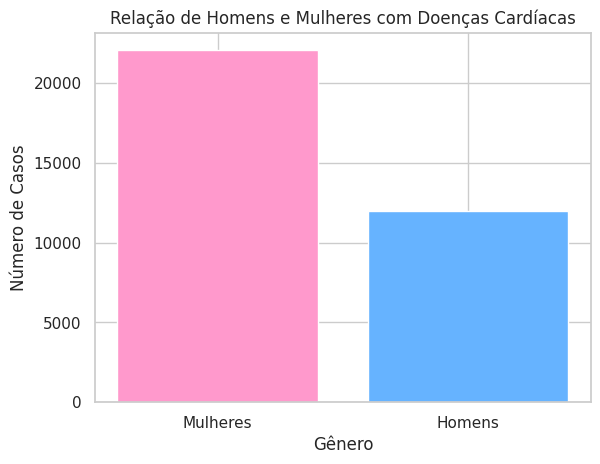

In [87]:
# Contagem de doenças cardíacas por gênero
cardio_gender_counts = df[df['doenca_cardiovascular'] == 'Com Doença']['genero'].value_counts()

# Plotagem do gráfico de barras
plt.bar(cardio_gender_counts.index, cardio_gender_counts.values, color=['#ff99cc','#66b3ff'])
plt.title('Relação de Homens e Mulheres com Doenças Cardíacas')
plt.xlabel('Gênero')
plt.ylabel('Número de Casos')
plt.xticks([0, 1], ['Mulheres', 'Homens'])
plt.show()

<Figure size 1000x600 with 0 Axes>

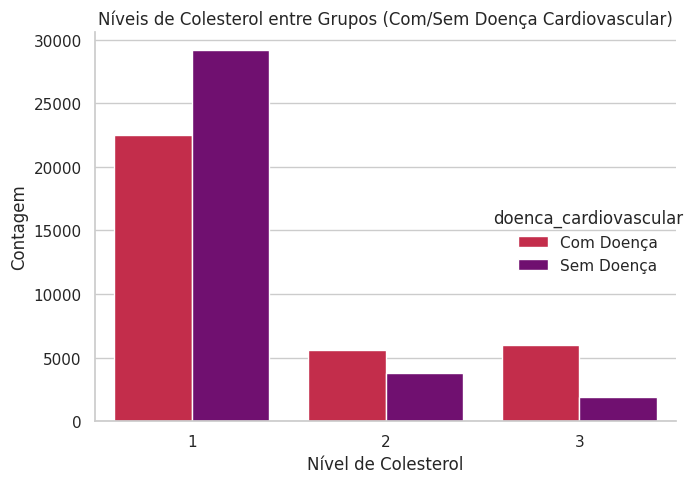

In [88]:
# Agrupando os dados por 'colesterol' e 'doenca_cardiovascular' e obtendo as contagens
dados_agrupados = df.groupby(['colesterol', 'doenca_cardiovascular']).size().reset_index(name='contagem')

# Plotando usando Seaborn
cores = ['#DC143C', '#800080']
plt.figure(figsize=(10, 6))
sns.catplot(x='colesterol', y='contagem', hue='doenca_cardiovascular', kind='bar', palette=cores, data=dados_agrupados)
plt.title('Níveis de Colesterol entre Grupos (Com/Sem Doença Cardiovascular)')
plt.xlabel('Nível de Colesterol')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()


 Em estudos médicos, existem relações entre o colesterol e doenças cardiovasculares. O colesterol ruim é chamado de lipoproteína de baixa densidade (LDL). Este é o culpado que faz a placa se formar nas suas artérias. Ter muitos LDLs pode levar a doenças cardíacas ao longo do tempo, mas no diagrama acima há um aumento nos pacientes com doenças cardiovasculares para a faixa de colesterol normal.

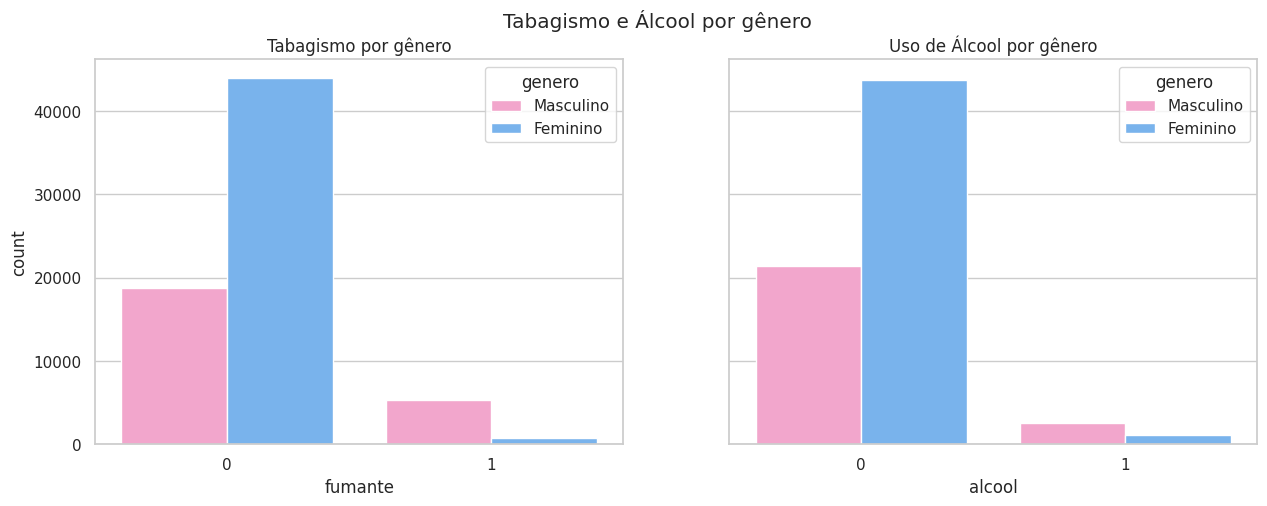

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Tabagismo e Álcool por gênero')
color=['#ff99cc','#66b3ff']
sns.countplot(ax=axes[0], x=df.fumante, hue=df.genero, palette=color)
axes[0].set_title("Tabagismo por gênero")

sns.countplot(ax=axes[1], x=df.alcool, hue=df.genero, palette=color)
axes[1].set_title("Uso de Álcool por gênero")
plt.show()


In [90]:
df['glicose'] = df['glicose'].replace({1: 'normal', 2: 'acima do normal', 3: 'bem acima do normal'})


In [91]:
pd.crosstab(df.glicose, df.doenca_cardiovascular)


doenca_cardiovascular,Com Doença,Sem Doença
glicose,,
acima do normal,2989,2091
bem acima do normal,3235,2002
normal,27843,30695


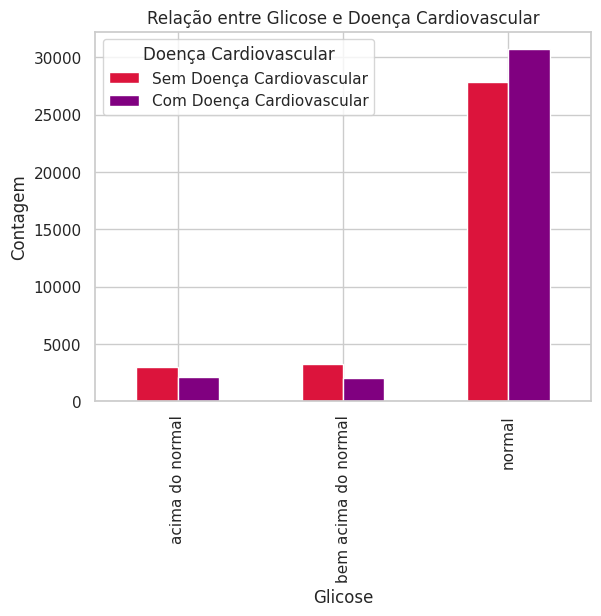

In [92]:
tabela_cruzada = pd.crosstab(df['glicose'], df['doenca_cardiovascular'])
tabela_cruzada.plot(kind='bar', color=cores)

plt.title('Relação entre Glicose e Doença Cardiovascular')
plt.xlabel('Glicose')
plt.ylabel('Contagem')
plt.legend(title='Doença Cardiovascular', labels=['Sem Doença Cardiovascular', 'Com Doença Cardiovascular'])

plt.show()


**Pessoas com diabetes tendem a desenvolver doenças cardíacas em uma idade mais jovem do que pessoas sem diabetes**

In [93]:
dados_masculinos = df[df['genero'] == 'Masculino']
dados_femininos = df[df['genero'] == 'Feminino']


In [94]:
pd.crosstab(df.atividade_fisica, df.doenca_cardiovascular)


doenca_cardiovascular,Com Doença,Sem Doença
atividade_fisica,,
0,7216,6333
1,26851,28455


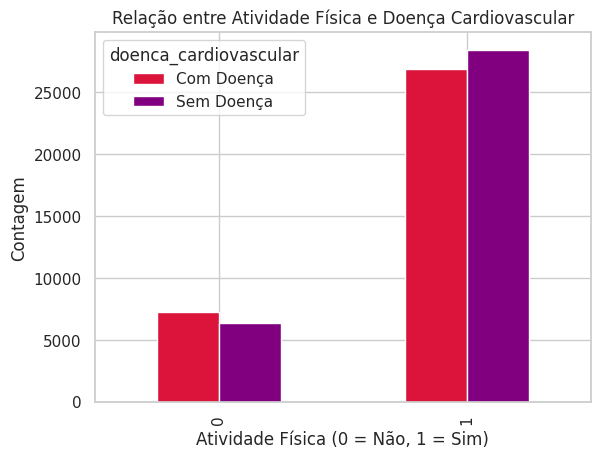

In [95]:
tabela_cruzada = pd.crosstab(df['atividade_fisica'], df['doenca_cardiovascular'])
tabela_cruzada.plot(kind='bar', color=cores)

plt.title('Relação entre Atividade Física e Doença Cardiovascular')
plt.xlabel('Atividade Física')
plt.ylabel('Contagem')
plt.xlabel('Atividade Física (0 = Não, 1 = Sim)')

plt.show()


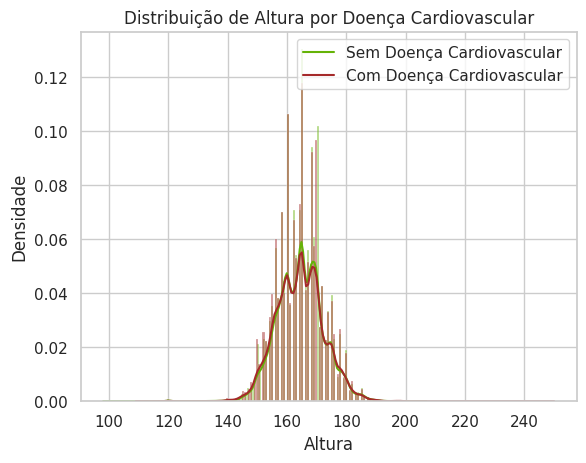

In [96]:
# Gráfico de distribuição para pacientes sem doença cardiovascular
sns.histplot(df[df['doenca_cardiovascular'] == 'Sem Doença']['altura'], color= '#65B307', kde=True, stat='density')

# Gráfico de distribuição para pacientes com doença cardiovascular
sns.histplot(df[df['doenca_cardiovascular'] == 'Com Doença']['altura'], color='#A52A2A', kde=True, stat='density')

plt.xlabel('Altura')
plt.ylabel('Densidade')
plt.title('Distribuição de Altura por Doença Cardiovascular')
plt.legend(labels=['Sem Doença Cardiovascular', 'Com Doença Cardiovascular'])

plt.show()

Abaixo de 18,5: Abaixo do peso
18,5 a 24,9: Peso normal
25 a 29,9: Sobrepeso
30 ou mais: Obesidade

In [97]:
# Categorizando o IMC
def categorize_imc(imc):
    if imc < 18.5:
        return 'Abaixo do peso'
    elif 18.5 <= imc < 25:
        return 'Peso normal'
    elif 25 <= imc < 30:
        return 'Sobrepeso'
    else:
        return 'Obesidade'

# Aplicando a função para criar uma nova coluna 'IMC_Categoria'
df['IMC_Categoria'] = df['IMC'].apply(categorize_imc)


**negrito**

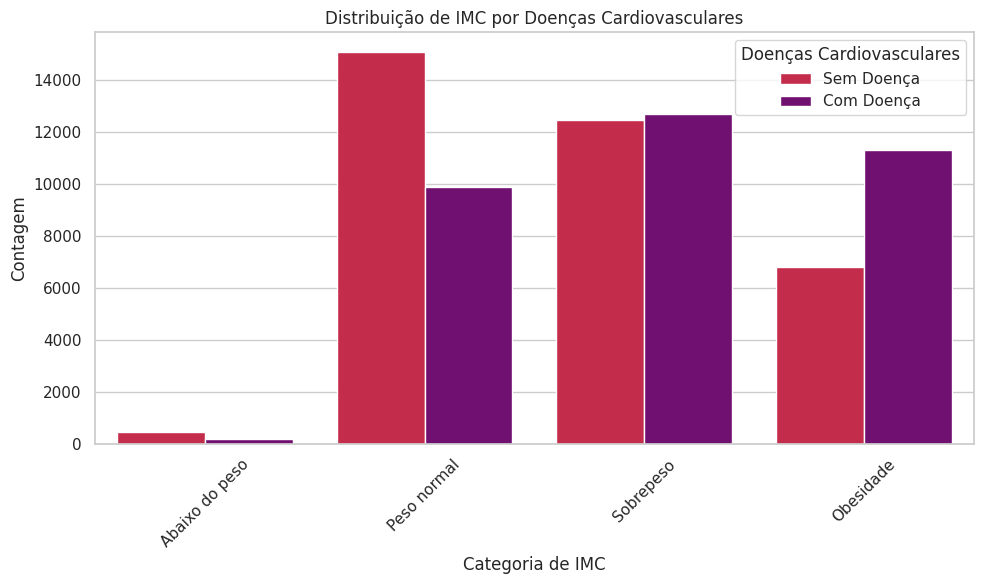

In [98]:
# Configurações estéticas
sns.set(style="whitegrid")

# Definindo a ordem das categorias de IMC
order = ['Abaixo do peso', 'Peso normal', 'Sobrepeso', 'Obesidade']

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='IMC_Categoria', hue='doenca_cardiovascular', data=df, palette=['#DC143C', '#800080'], order=order)

# Adicionando título e rótulos
plt.title('Distribuição de IMC por Doenças Cardiovasculares')
plt.xlabel('Categoria de IMC')
plt.ylabel('Contagem')

# Exibindo o gráfico
plt.legend(title='Doenças Cardiovasculares', labels=['Sem Doença', 'Com Doença'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Aplicação do Modelo de Regressão Logística**

In [99]:
#Passando tudo para valores númericos
df['genero'].replace({'Feminino': 1, 'Masculino': 2}, inplace=True)
df['doenca_cardiovascular'].replace({'Sem Doença': 0, 'Com Doença': 1}, inplace=True)
df['glicose'] = df['glicose'].replace({'normal': 1, 'acima do normal': 2, 'bem acima do normal': 3})


<ipython-input-99-422fd36b01e7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genero'].replace({'Feminino': 1, 'Masculino': 2}, inplace=True)
<ipython-input-99-422fd36b01e7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['genero'].replace({'Feminino': 1, 'Masculino': 2}, inplace=True)
<i

In [100]:
df.head()

,genero,altura,peso,Pressao_alta,pressao_baixa,colesterol,glicose,fumante,alcool,atividade_fisica,doenca_cardiovascular,idade,IMC,IMC_Categoria
0,2,168,62.0,110,80,1,1,0,0,1,0,50,22.0,Peso normal
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.9,Obesidade
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.5,Peso normal
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.7,Sobrepeso
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.0,Peso normal


In [101]:
df.drop(columns=['IMC_Categoria'], inplace=True)

In [102]:
from sklearn.model_selection import train_test_split

# Separando as features (variáveis independentes) e o alvo (variável dependente)
X = df.drop('doenca_cardiovascular', axis=1)  # Features
y = df['doenca_cardiovascular']  # Alvo

# Dividindo os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Imprimindo as dimensões dos conjuntos de treinamento e teste
print("Dimensões dos conjuntos de treinamento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nDimensões dos conjuntos de teste:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Dimensões dos conjuntos de treinamento:
X_train: (61969, 12)
y_train: (61969,)

Dimensões dos conjuntos de teste:
X_test: (6886, 12)
y_test: (6886,)


In [103]:
# Inicializando e treinando o modelo de regressão logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Criando um novo DataFrame com as previsões e os rótulos verdadeiros
#df_modelo = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred})

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)  # Calculando a acurácia
report = classification_report(y_test, y_pred)  # Gerando o relatório de classificação

# Imprimindo os resultados
print(f'Acurácia do modelo: {accuracy:.2f}')  # Imprime a acurácia formatada com duas casas decimais
print('Relatório de classificação:')  # Imprime o cabeçalho do relatório
print(report)  # Imprime o relatório de classificação

Acurácia do modelo: 0.74
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      3473
           1       0.76      0.69      0.72      3413

    accuracy                           0.74      6886
   macro avg       0.74      0.74      0.73      6886
weighted avg       0.74      0.74      0.73      6886



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:

# Realizando validação cruzada
cv_scores = cross_val_score(model, X, y, cv=5)

# Calculando a média dos scores
mean_cv_score = cv_scores.mean()

print(f'Média da acurácia na validação cruzada: {mean_cv_score:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Média da acurácia na validação cruzada: 0.73


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
# Inicializar o modelo
model = RandomForestClassifier()

# Treinar o modelo
model.fit(X_train, y_train)

# Obter importância das características
feature_importance = model.feature_importances_



In [106]:
#Um array que indica as probabilidades de um conjunto de dados correlacionados,terem ou não doenças cardíacas

# Inicialize e treine o modelo de regressão logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Faça previsões de probabilidade
y_pred_proba = model.predict_proba(X_test)

# Exiba as previsões de probabilidade
print(y_pred_proba)


[[0.48769476 0.51230524]
 [0.23654652 0.76345348]
 [0.24728806 0.75271194]
 ...
 [0.04964322 0.95035678]
 [0.86435322 0.13564678]
 [0.64106018 0.35893982]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
# Definir limites para categorização
limite_baixo = 0.25
limite_alto = 0.75

# Categorizar as probabilidades
categorias = []
for probabilidade in y_pred_proba[:, 1]:  # Considerando apenas as probabilidades da classe positiva
    if probabilidade < limite_baixo:
        categorias.append('Baixa chance')
    elif probabilidade < limite_alto:
        categorias.append('Média chance')
    else:
        categorias.append('Alta chance')

# Exibir as categorias
print(categorias)

['Média chance', 'Alta chance', 'Alta chance', 'Média chance', 'Alta chance', 'Alta chance', 'Média chance', 'Alta chance', 'Média chance', 'Baixa chance', 'Baixa chance', 'Baixa chance', 'Alta chance', 'Média chance', 'Alta chance', 'Média chance', 'Média chance', 'Baixa chance', 'Média chance', 'Baixa chance', 'Média chance', 'Média chance', 'Média chance', 'Alta chance', 'Baixa chance', 'Média chance', 'Alta chance', 'Alta chance', 'Média chance', 'Baixa chance', 'Média chance', 'Baixa chance', 'Baixa chance', 'Média chance', 'Média chance', 'Média chance', 'Baixa chance', 'Alta chance', 'Média chance', 'Média chance', 'Alta chance', 'Média chance', 'Baixa chance', 'Média chance', 'Média chance', 'Baixa chance', 'Baixa chance', 'Alta chance', 'Média chance', 'Média chance', 'Baixa chance', 'Média chance', 'Baixa chance', 'Média chance', 'Média chance', 'Média chance', 'Média chance', 'Alta chance', 'Alta chance', 'Média chance', 'Média chance', 'Média chance', 'Baixa chance', 'Alta 

# **Testando outro modelo(Decision Tree)**

In [108]:
pip install xgboost

In [109]:
# Converter colunas para numéricas, corrigindo possíveis erros de formato
X = X.apply(pd.to_numeric, errors='coerce')  # Converte todas as colunas para numérico
# Verificar se há valores nulos e tratá-los
X = X.fillna(X.mean())


In [110]:
# Importando as bibliotecas necessárias
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import joblib  # Para salvar o modelo treinado

# Separando as features (variáveis independentes) e o alvo (variável dependente)
X = df.drop('doenca_cardiovascular', axis=1)  # Features
y = df['doenca_cardiovascular']  # Alvo

# Convertendo as colunas para numérico
X = X.apply(pd.to_numeric, errors='coerce')

# Tratando valores nulos (preenchendo com a média, por exemplo)
X = X.fillna(X.mean())

# Dividindo o dataset em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,          # Número de árvores (boosting rounds)
    max_depth=10,              # Limita a profundidade das árvores
    learning_rate=0.1,         # Taxa de aprendizado
    subsample=0.8,             # Subamostragem das instâncias
    colsample_bytree=0.8,      # Subamostragem das features
    random_state=42            # Garante reprodutibilidade
)

# Adicionando Cross-Validation (usando K-Fold com 5 divisões)
cross_val_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

# Calculando a média e o desvio padrão das acurácias obtidas
mean_score = cross_val_scores.mean() * 100
std_dev = cross_val_scores.std() * 100

# Exibindo os resultados do Cross-Validation
print(f"Cross-Validation Acurácia Média: {mean_score:.2f}%")
print(f"Desvio Padrão da Acurácia: {std_dev:.2f}%")

# Treinando o modelo com o conjunto de treinamento
xgb_model.fit(X_train, y_train)

# Salvando o modelo treinado para uso futuro no Streamlit
joblib.dump(xgb_model, 'modelo_xgboost.pkl')

# Fazendo previsões no conjunto de teste
y_pred = xgb_model.predict(X_test)

# Calculando a precisão no conjunto de teste
acc_xgb = round(accuracy_score(y_test, y_pred) * 100, 2)

# Imprimindo a precisão
print(f"Acurácia do XGBoost no grupo de teste: {acc_xgb}%")

# Avaliando o desempenho com outras métricas
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Calculando a acurácia na base completa
acc_test_xgb = round(accuracy_score(y, xgb_model.predict(X)) * 100, 2)
print(f"Acurácia na base inteira: {acc_test_xgb}%")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:

# Verificando o tamanho dos arrays
print("Tamanho de y_test:", len(y_test))
print("Tamanho de y_pred:", len(y_pred))

# Ajustando y_test e y_pred para garantir que tenham o mesmo tamanho
if len(y_test) > len(y_pred):
    y_test = y_test[:len(y_pred)]
elif len(y_pred) > len(y_test):
    y_pred = y_pred[:len(y_test)]

# Verificando os tamanhos novamente
print("Tamanho ajustado de y_test:", len(y_test))
print("Tamanho ajustado de y_pred:", len(y_pred))

# Criando um novo DataFrame com as previsões e os rótulos verdadeiros
df_modelo = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred})

# Exibindo as primeiras linhas do DataFrame para verificação
print(df_modelo.head())


In [ ]:
# Criando um novo DataFrame com as previsões e os rótulos verdadeiros
df_modelo = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred})

In [ ]:
df_modelo.head() #NOVO DATAFRAME COM RESULTAO DOS MODELOS

# **Análise dos Resultados do Modelo**

In [ ]:
# Criar um DataFrame a partir do array numpy
feature_importance_df = pd.DataFrame(data=feature_importance, columns=['Coefficient'], index=X.columns)

# Ordenar o DataFrame pela coluna 'Coefficient'
feature_importance_sorted = feature_importance_df.sort_values(by='Coefficient')

# Plotar a importância das características ordenadas
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_sorted.index, feature_importance_sorted['Coefficient'], color='#DC143C')
plt.xlabel('Importância')
plt.ylabel('Medidas')
plt.title('Importância das Medidas')
plt.show()


In [ ]:
# Dividindo os dados em treino e teste novamente (mantendo a divisão anterior com 0.33)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Verificando o tamanho dos conjuntos
print("Tamanho de X_train:", len(X_train))
print("Tamanho de X_test:", len(X_test))
print("Tamanho de y_train:", len(y_train))
print("Tamanho de y_test:", len(y_test))

# Treinando o modelo XGBoost (utilizando o modelo já definido)
xgb_model = XGBClassifier(
    n_estimators=100,          # Número de árvores (boosting rounds)
    max_depth=10,              # Limita a profundidade das árvores
    learning_rate=0.1,         # Taxa de aprendizado
    subsample=0.8,             # Subamostragem das instâncias
    colsample_bytree=0.8,      # Subamostragem das features
    random_state=42            # Garante reprodutibilidade
)

xgb_model.fit(X_train, y_train)

# Previsões
y_pred = xgb_model.predict(X_test)

# Calcular a matriz de confusão
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão como um heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcula as probabilidades previstas
y_prob = model.predict_proba(X_test)[:, 1]

# Calcula a taxa de falsos positivos (fpr) e a taxa de verdadeiros positivos (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcula a AUC (Área sob a curva ROC)
roc_auc = auc(fpr, tpr)

# Plota a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Exibe a AUC
print(f'AUC: {roc_auc:.2f}')


In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
from xgboost import XGBClassifier

# Dados do paciente para teste
# Certifique-se de que os dados do paciente estejam no mesmo formato das features usadas para treinar o modelo
dados_paciente = np.array([[30, 110, 150, 90, 0, 1, 0, 0, 0, 0, 1, 1]])
# Exemplo: [idade, pressão alta, colesterol, glicose, fumante, atividade física, outras_features]

# Usando o modelo XGBoost treinado
# O modelo já foi treinado com X_train e y_train anteriormente
# Se você estiver carregando o modelo salvo, faça isso primeiro:
# xgb_model = joblib.load('modelo_xgboost.pkl')

# Fazer previsões de probabilidade
probabilidades = xgb_model.predict_proba(dados_paciente)

# Defina os limites
limite_baixo = 0.25
limite_alto = 0.75

# Categorize as probabilidades
if probabilidades[0][1] < limite_baixo:
    categoria = 'Baixa chance'
elif probabilidades[0][1] < limite_alto:
    categoria = 'Média chance'
else:
    categoria = 'Alta chance'

# Exiba a categoria
print("Probabilidade de ter doença cardíaca:", categoria)


In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
import pandas as pd
#SE NAO FUNCIONAR,SIGNIFICA QUE AQUI TEM QUE DROPAR AS DUAS PRIMEIRAS

# Alterar os valores da coluna 'pressao_alta'
df['Pressao_alta'] = df['Pressao_alta'].apply(lambda x: 1 if x > 120 else 0)

# Alterar os valores da coluna 'pressao_baixa'
df['pressao_baixa'] = df['pressao_baixa'].apply(lambda x: 1 if x > 80 else 0)

# Alterar os valores da coluna 'IMC' para 3 (obeso), 2 (acima do peso), 1 (normal)
def categorize_imc(imc):
    if imc >= 30:
        return 3  # obeso
    elif imc >= 25:
        return 2  # acima do peso
    else:
        return 1  # normal

df['IMC'] = df['IMC'].apply(categorize_imc)

# Exibir o DataFrame ajustado
print(df.head())


[texto do link](https://)df.head()

In [ ]:
df.drop('IMC',axis =1 )

In [ ]:
# Importando as bibliotecas necessárias
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib  # Para salvar o modelo treinado

# Separando as features (variáveis independentes) e o alvo (variável dependente)
X = df.drop(['doenca_cardiovascular', 'IMC','altura'], axis=1)  # Removendo também a coluna 'IMC'
y = df['doenca_cardiovascular']  # Alvo

# Convertendo as colunas para numérico antes de aplicar o peso
X['colesterol'] = pd.to_numeric(X['colesterol'], errors='coerce')
X['idade'] = pd.to_numeric(X['idade'], errors='coerce')
X['peso'] = pd.to_numeric(X['peso'], errors='coerce')

# Normalizando as features para evitar que uma variável tenha mais influência do que deveria
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo o dataset em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criando o modelo XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,          # Número de árvores (boosting rounds)
    max_depth=10,              # Limita a profundidade das árvores
    learning_rate=0.1,         # Taxa de aprendizado
    subsample=0.8,             # Subamostragem das instâncias
    colsample_bytree=0.8,      # Subamostragem das features
    random_state=42            # Garante reprodutibilidade
)

# Treinando o modelo com o conjunto de treinamento
xgb_model.fit(X_train, y_train)

# Salvando o modelo treinado para uso futuro no Streamlit
joblib.dump(xgb_model, 'modelo_v12.pkl')

# Fazendo previsões no conjunto de teste
y_pred = xgb_model.predict(X_test)

# Calculando a precisão no conjunto de teste
acc_xgb = round(accuracy_score(y_test, y_pred) * 100, 2)

# Imprimindo a precisão
print(f"Acurácia do XGBoost no grupo de teste: {acc_xgb}%")

# Avaliando o desempenho com outras métricas
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Calculando a acurácia na base completa
acc_test_xgb = round(accuracy_score(y, xgb_model.predict(X_scaled)) * 100, 2)
print(f"Acurácia na base inteira: {acc_test_xgb}%")
